<a href="https://colab.research.google.com/github/nirmalya8/Iris_Dataset_Analysis/blob/main/Iris_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [2]:
data = pd.read_csv("/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let us have a look at the dimensions of the dataset

In [3]:
data.shape

(150, 6)

So, there are 6 columns and 150 data points.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see, there are no null values. "Species" is the column to be predicted. 

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Changing the Species column into numerical values

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['species']= label_encoder.fit_transform(data['Species'])

In [7]:
(data["Species"].value_counts()),(data["species"].value_counts())

(Iris-versicolor    50
 Iris-setosa        50
 Iris-virginica     50
 Name: Species, dtype: int64, 2    50
 1    50
 0    50
 Name: species, dtype: int64)

Plotting each column against each other

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


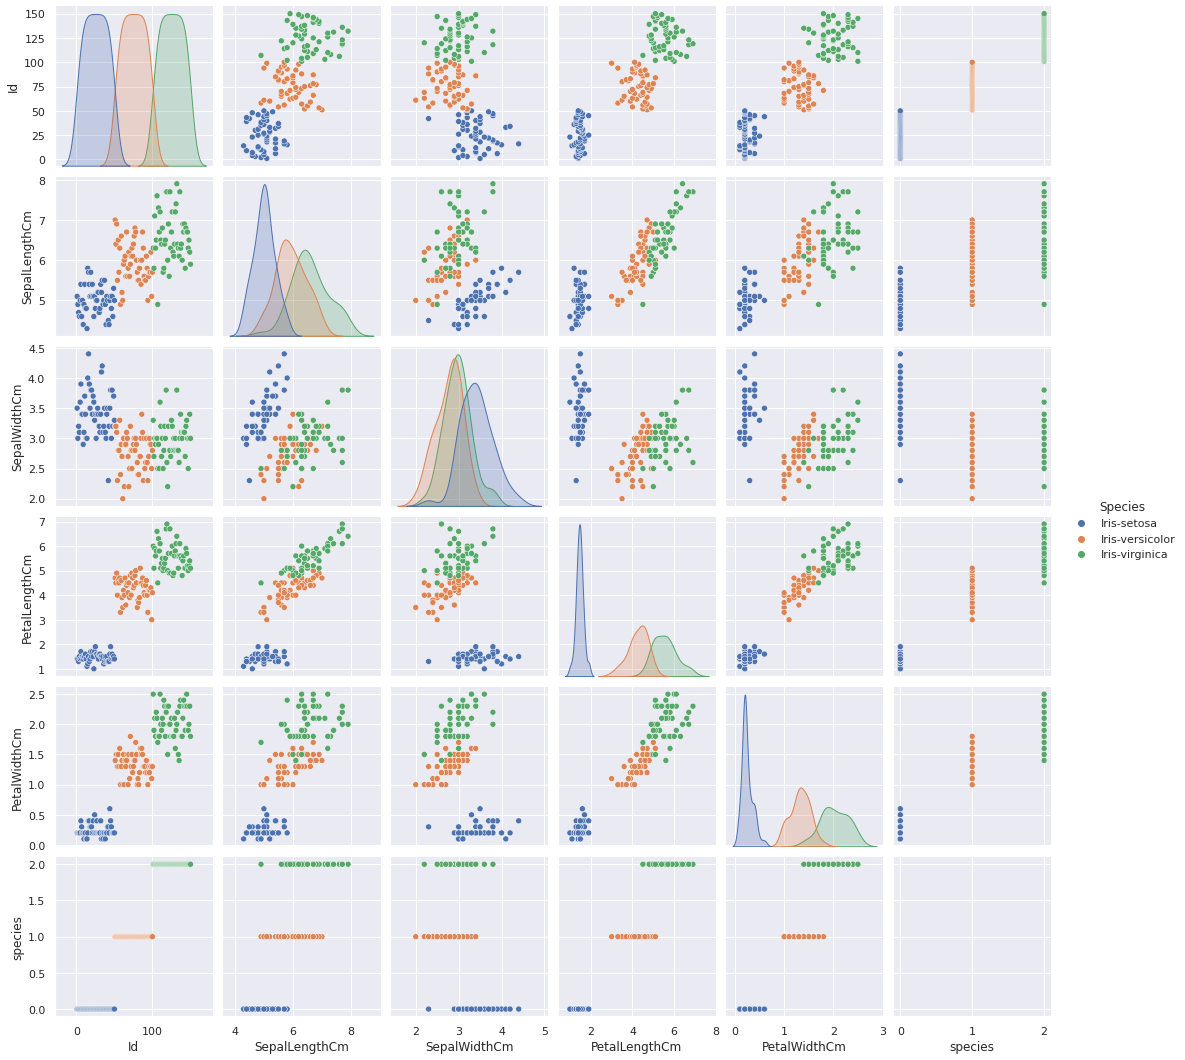

In [23]:
sns.pairplot(data,hue='Species')

Checking out the species column

([<matplotlib.patches.Wedge at 0x7f3a568e8cc0>,
 [Text(-0.3105828902976257, 1.1591109818539265, 'Iris-virginica'),
  Text(-0.8485280579789157, -0.848528216868791, 'Iris-versicolor'),
  Text(1.1591110400116436, -0.3105826732500158, 'Iris-setosa')])

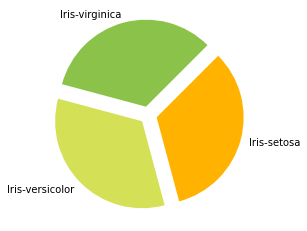

In [9]:
colors = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie ( list(data["Species"].value_counts()), labels = ['Iris-virginica','Iris-versicolor','Iris-setosa']  , colors= colors , startangle=45,explode=[0.1,0.1,0.1])

## BIVARIATE ANALYSIS

Plotting Species against Sepal Length

Text(0, 0.5, 'Sepal Length')

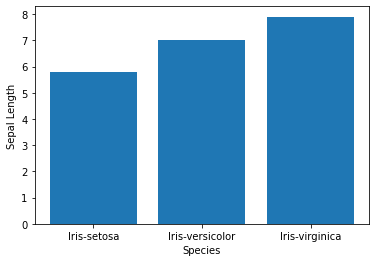

In [10]:
plt.bar(data["Species"],data["SepalLengthCm"])
plt.xlabel('Species')
plt.ylabel('Sepal Length')

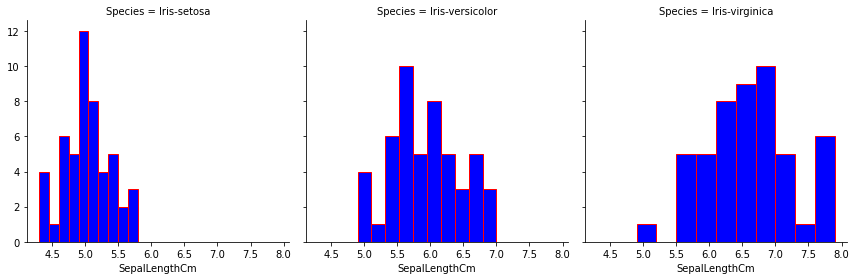

In [11]:
g = sns.FacetGrid(data, col="Species"  , height=4, aspect=1)
g = g.map(plt.hist,"SepalLengthCm",color='blue',edgecolor ='r', linewidth=1)

Plotting Sepal Width against Species

Text(0, 0.5, 'Sepal Width')

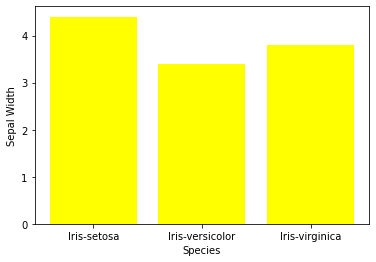

In [12]:
plt.bar(data["Species"],data["SepalWidthCm"],color='yellow')
plt.xlabel('Species')
plt.ylabel('Sepal Width')

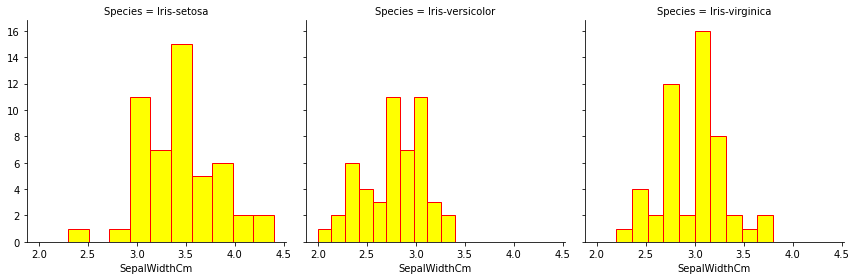

In [13]:
g = sns.FacetGrid(data, col="Species"  , height=4, aspect=1)
g = g.map(plt.hist,"SepalWidthCm",color='yellow',edgecolor ='r', linewidth=1)

Text(0, 0.5, 'Petal Length')

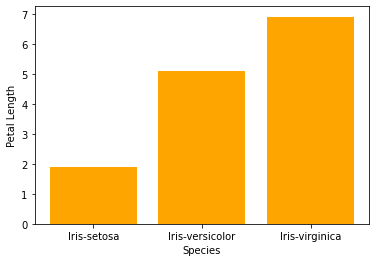

In [14]:
plt.bar(data["Species"],data["PetalLengthCm"],color='orange')
plt.xlabel('Species')
plt.ylabel('Petal Length')

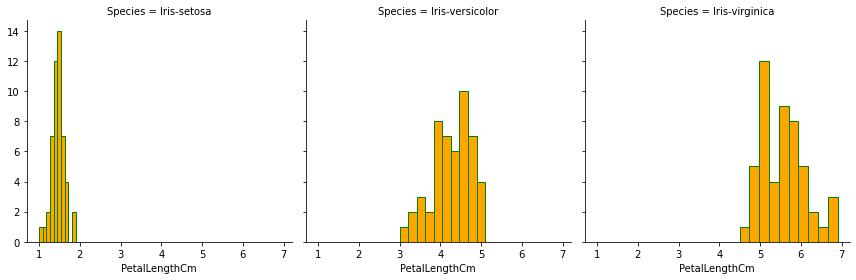

In [15]:
g = sns.FacetGrid(data, col="Species"  , height=4, aspect=1)
g = g.map(plt.hist,"PetalLengthCm",color='orange',edgecolor ='g', linewidth=1)

Text(0, 0.5, 'Petal Width')

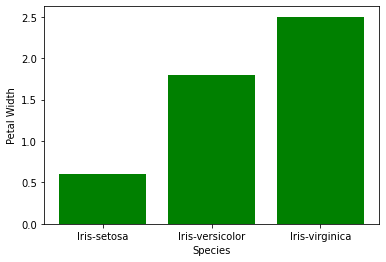

In [16]:
plt.bar(data["Species"],data["PetalWidthCm"],color='g')
plt.xlabel('Species')
plt.ylabel('Petal Width')

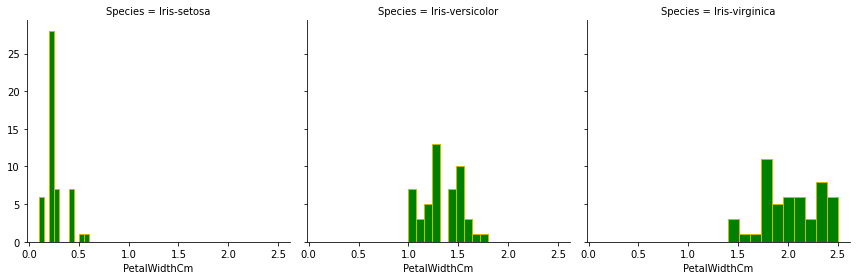

In [17]:
g = sns.FacetGrid(data, col="Species"  , height=4, aspect=1)
g = g.map(plt.hist,"PetalWidthCm",color='green',edgecolor ='y', linewidth=1)

In [18]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


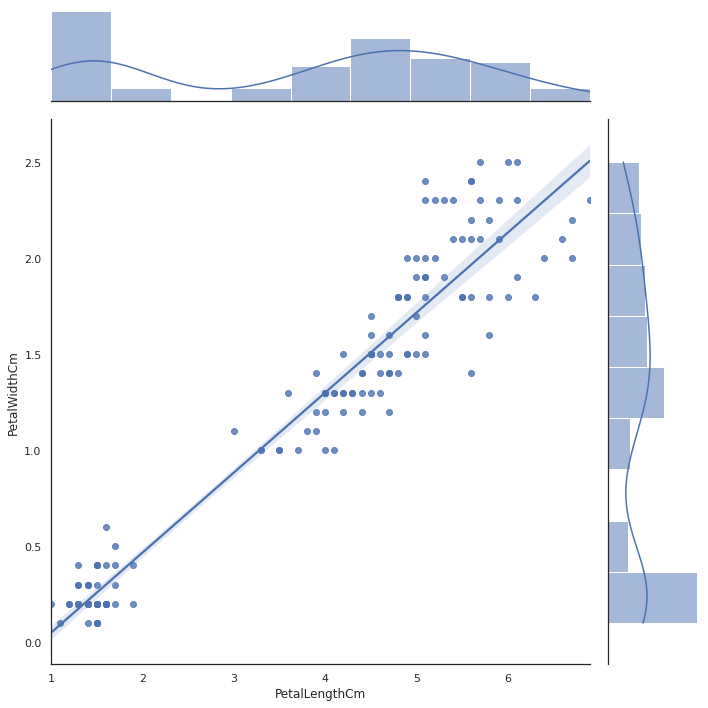

In [19]:
sns.set(style="white",color_codes=True) #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=data , height = 10, kind="reg")

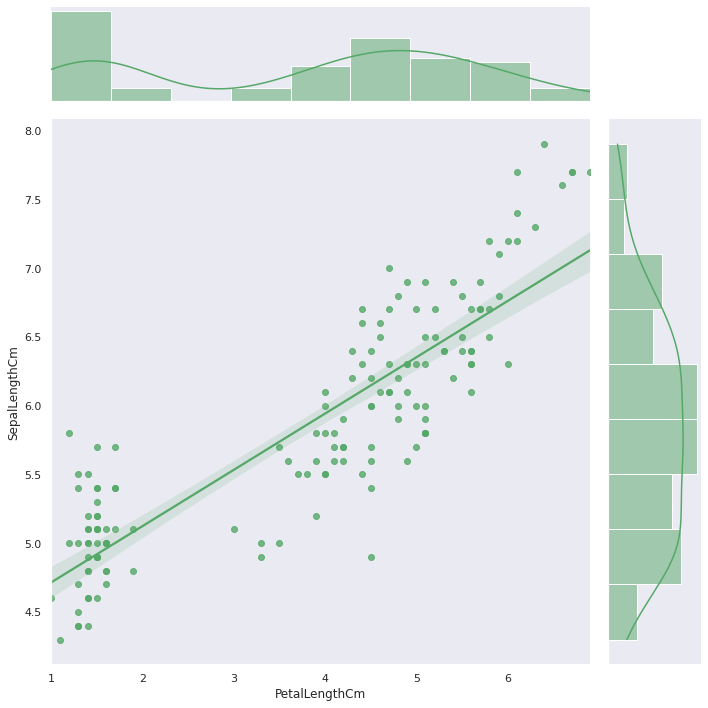

In [20]:
sns.set(style="dark",color_codes=True) #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.jointplot(x="PetalLengthCm", y="SepalLengthCm", data=data , height = 10, kind="reg",color='g')

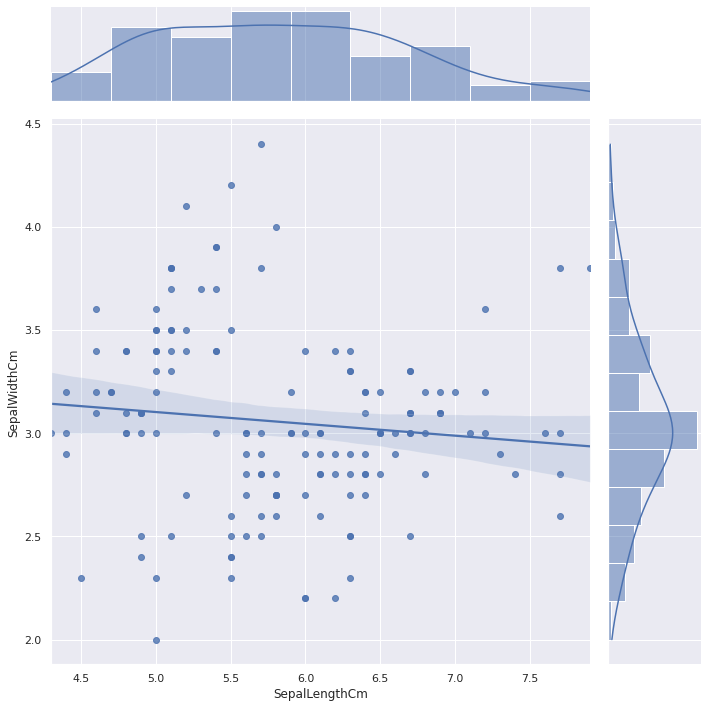

In [21]:
sns.set(style="darkgrid",color_codes=True) #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data , height = 10, kind="reg")